In [16]:
import numpy as np
import torch

import matplotlib.pyplot as plt

import loss
import constant
import visual

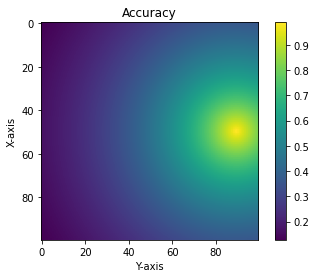

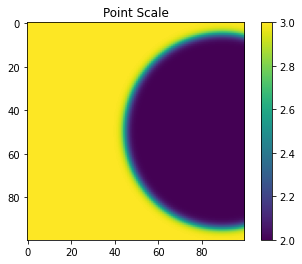

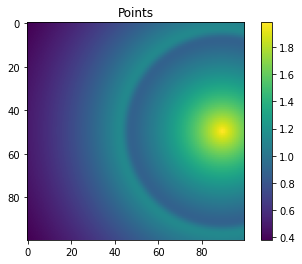

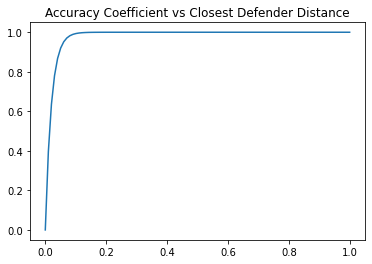

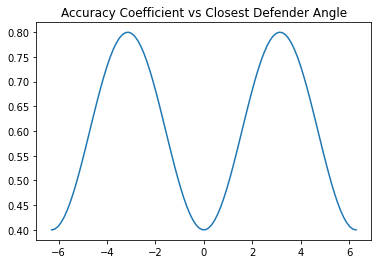

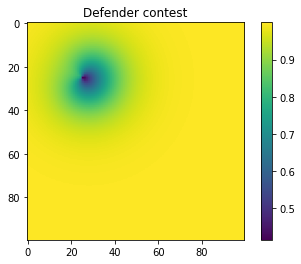

In [17]:
%matplotlib inline

resolution = 100
x, y = torch.meshgrid(torch.linspace(-1, 1, resolution), torch.linspace(-1,1, resolution))
pos_grid = torch.stack((x, y), dim=-1)


raw_acc = loss.raw_accuracy(pos_grid)
plt.imshow(raw_acc.numpy())
plt.xlabel('Y-axis')
plt.ylabel('X-axis')
plt.title('Accuracy')
plt.colorbar()
plt.show()


ps = loss.raw_points(pos_grid)
plt.imshow(ps.numpy())
plt.title('Point Scale')
plt.colorbar()
plt.show()


plt.imshow((ps*raw_acc).numpy())
plt.title('Points')
plt.colorbar()
plt.show()


d = torch.linspace(0, 1, 100)
cont = loss.raw_contest_distance(d)
plt.plot(d.numpy(), cont.numpy())
plt.title('Accuracy Coefficient vs Closest Defender Distance')
plt.show()


d = torch.linspace(-2*np.pi, 2*np.pi, 100)
cont = loss.raw_contest_angle(d)
plt.plot(d.numpy(), cont.numpy())
plt.title('Accuracy Coefficient vs Closest Defender Angle')
plt.show()

pos_op = torch.tensor([-0.5,-0.5])
cont = loss.contest(pos_op, pos_grid)
plt.imshow(cont.numpy())#, vmin=0, vmax=1)
plt.title('Defender contest')
plt.colorbar()
plt.show()




torch.Size([1, 1, 2])
torch.Size([1, 5, 2])
torch.Size([1, 1])
Points per Possession:  0.8950744867324829


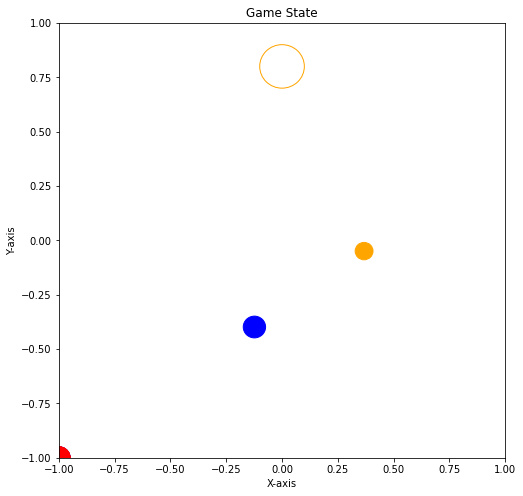

In [18]:
last_game_state = torch.rand(1, 11, 2)*2-1.
last_game_state[:, 1:5, :] = -1
last_game_state[:, 5:10, :] = -1 #last_game_state[:, :1, :]+torch.rand(1, 5, 2)-0.5
pos_op = last_game_state[:, :1, :]
pos_dp = last_game_state[:, constant.idxs_dp, :]

print(pos_op.shape)
print(pos_dp.shape)

ppp = loss.points_per_possession(pos_op, pos_dp)
print(ppp.shape)

print('Points per Possession: ', ppp.item())

visual.show_game_state(last_game_state[0])
plt.show()

In [22]:
last_game_state = torch.rand(1, 11, 2)*2.-1.
pos_op = last_game_state[:, :1, :]
pos_dp = last_game_state[:, constant.idxs_dp, :]
loss.points_per_possession(pos_op, pos_dp).shape

torch.Size([1, 1])